In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import my_pybursts
# from pybursts import *

%matplotlib inline

In [2]:
date = "6-25"
next_date = "6-26"

param_s = 2
param_gamma = 1

In [3]:
openfile="./ms_time.csv"
# savefile="./data/2013-7-23_s="+str(param_s)+"_gamma="+str(param_gamma)+".npy"
# savefile="./data/2013-"+date+"_s="+str(param_s)+"_gamma="+str(param_gamma)+".npy"
savefigure="./data/burst_"+date+".png"
fig_lavel="All Tweets bursts"

In [4]:
# 通常版表示
df = pd.read_csv(openfile)

In [5]:
df_zip = df
df_zip.time = pd.to_datetime(df_zip.time)
df_zip = df_zip.sort_index(axis=1, ascending=False)

In [6]:
data = [pd.Timestamp(i).value for i in df.time]

In [7]:
burst = my_pybursts.kleinberg(data,s=param_s,gamma=param_gamma)

In [8]:
#np.save(savefile,burst)

In [9]:
df_burst = pd.DataFrame(burst,columns=['Level','Start','End'])
burst = []
for i in range(len(df_burst)) :
    if i!=0 :
        temp_level = 0
        next_time = df_burst['End'][i-1]+1
        for j in range(int(len(df_burst))) :
            if df_burst['Start'][j] < next_time and next_time < df_burst['End'][j] :
                if temp_level < df_burst['Level'][j] :
                    temp_level = df_burst['Level'][j]
        burst.append([pd.to_datetime(df_burst['End'][i-1]+1),temp_level])
        burst.append([pd.to_datetime(df_burst['Start'][i]-1),temp_level])
    burst.append([pd.to_datetime(df_burst['Start'][i]),df_burst['Level'][i]])
    burst.append([pd.to_datetime(df_burst['End'][i]),df_burst['Level'][i]])
df_burst = pd.DataFrame(burst,columns=['time',fig_lavel])

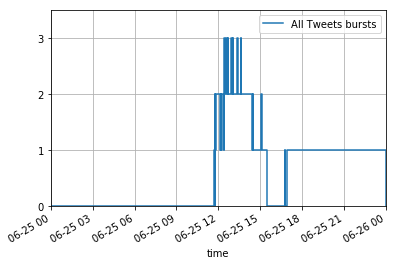

In [10]:
df_burst = df_burst.set_index('time')
df_burst.plot(drawstyle='steps-post')
plt.grid()
plt.ylim([0,3.5])
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))
# plt.xlim(pd.Timestamp('2013-7-23 00:00:00'),pd.Timestamp('2013-7-24 00:00:00'))
plt.xlim(pd.Timestamp('2013-'+date+' 00:00:00'),pd.Timestamp('2013-'+next_date+' 00:00:00'))
#plt.show()
#plt.savefig(savefig)
plt.savefig(savefigure)